# Fare & Revenue Analysis
Analysis of taxi fares and tipping behavior.

## Fare Analysis
Compute average fares and analyze fare distribution for various trip lengths.

{'infer_column_types': 'False', 'activity': 'download'}
{'infer_column_types': 'False', 'activity': 'download', 'activityApp': 'FileDataset'}
[Info] read from C:\Users\Megan\AppData\Local\Temp\tmpwam1m18n\https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/green/puYear=2018/puMonth=5/part-00087-tid-4753095944193949832-fee7e113-666d-4114-9fcb-bcd3046479f3-2657-1.c000.snappy.parquet
[Info] read from C:\Users\Megan\AppData\Local\Temp\tmpwam1m18n\https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/green/puYear=2018/puMonth=6/part-00171-tid-4753095944193949832-fee7e113-666d-4114-9fcb-bcd3046479f3-2741-1.c000.snappy.parquet
Index(['vendorID', 'lpepPickupDatetime', 'lpepDropoffDatetime',
       'passengerCount', 'tripDistance', 'puLocationId', 'doLocationId',
       'pickupLongitude', 'pickupLatitude', 'dropoffLongitude',
       'dropoffLatitude', 'rateCodeID', 'storeAndFwdFlag', 'paymentType',
       'fareAmount', 'extra', 'mtaTax', 'improvementSurcharge', 'tipAmount',
       'tollsAmount', 

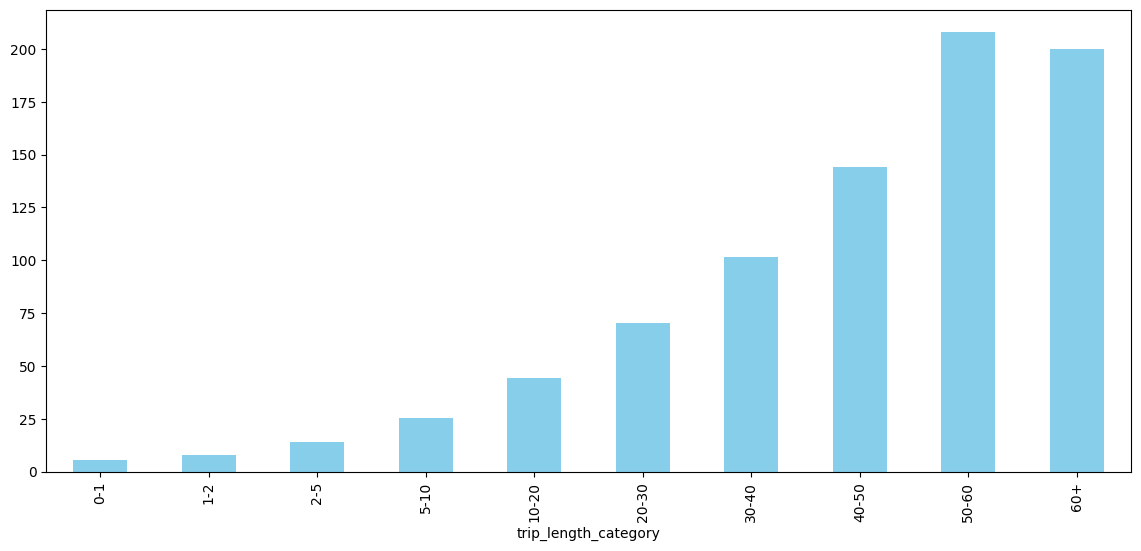

In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
from azureml.opendatasets import NycTlcGreen
from datetime import datetime
from dateutil import parser
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the date range
end_date = parser.parse('2018-06-06')
start_date = parser.parse('2018-05-01')

# Fetch the dataset
nyc_tlc = NycTlcGreen(start_date=start_date, end_date=end_date)
nyc_tlc_df = nyc_tlc.to_pandas_dataframe()

# Display the columns to verify the names
print(nyc_tlc_df.columns)

# Check if 'tripDistance' and 'fareAmount' exist
if 'tripDistance' not in nyc_tlc_df.columns or 'fareAmount' not in nyc_tlc_df.columns:
    print("Columns 'tripDistance' or 'fareAmount' not found. Available columns are:")
    print(nyc_tlc_df.columns)
else:
    # Convert pickup and dropoff datetime to pandas datetime format
    nyc_tlc_df['lpepPickupDatetime'] = pd.to_datetime(nyc_tlc_df['lpepPickupDatetime'])
    nyc_tlc_df['lpepDropoffDatetime'] = pd.to_datetime(nyc_tlc_df['lpepDropoffDatetime'])

    # Compute trip duration in minutes
    nyc_tlc_df['trip_duration'] = (nyc_tlc_df['lpepDropoffDatetime'] - nyc_tlc_df['lpepPickupDatetime']).dt.total_seconds() / 60.0

    # Remove rows with zero or negative trip distances and fares for analysis
    nyc_tlc_df = nyc_tlc_df[(nyc_tlc_df['tripDistance'] > 0) & (nyc_tlc_df['fareAmount'] > 0)]

    # Define trip length categories
    bins = [0, 1, 2, 5, 10, 20, 30, 40, 50, 60, float('inf')]
    labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']
    nyc_tlc_df['trip_length_category'] = pd.cut(nyc_tlc_df['tripDistance'], bins=bins, labels=labels, right=False)

    # Compute average fares for each trip length category
    average_fares = nyc_tlc_df.groupby('trip_length_category')['fareAmount'].mean()

    # Plot average fares by trip length category
    plt.figure(figsize=(14, 6))
    average_fares.plot(kind='bar', color='skyblue')


{'infer_column_types': 'False', 'activity': 'download'}
{'infer_column_types': 'False', 'activity': 'download', 'activityApp': 'FileDataset'}
[Info] read from C:\Users\Megan\AppData\Local\Temp\tmpyz3s8rki\https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/green/puYear=2018/puMonth=5/part-00087-tid-4753095944193949832-fee7e113-666d-4114-9fcb-bcd3046479f3-2657-1.c000.snappy.parquet
[Info] read from C:\Users\Megan\AppData\Local\Temp\tmpyz3s8rki\https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/green/puYear=2018/puMonth=6/part-00171-tid-4753095944193949832-fee7e113-666d-4114-9fcb-bcd3046479f3-2741-1.c000.snappy.parquet
Index(['vendorID', 'lpepPickupDatetime', 'lpepDropoffDatetime',
       'passengerCount', 'tripDistance', 'puLocationId', 'doLocationId',
       'pickupLongitude', 'pickupLatitude', 'dropoffLongitude',
       'dropoffLatitude', 'rateCodeID', 'storeAndFwdFlag', 'paymentType',
       'fareAmount', 'extra', 'mtaTax', 'improvementSurcharge', 'tipAmount',
       'tollsAmount', 

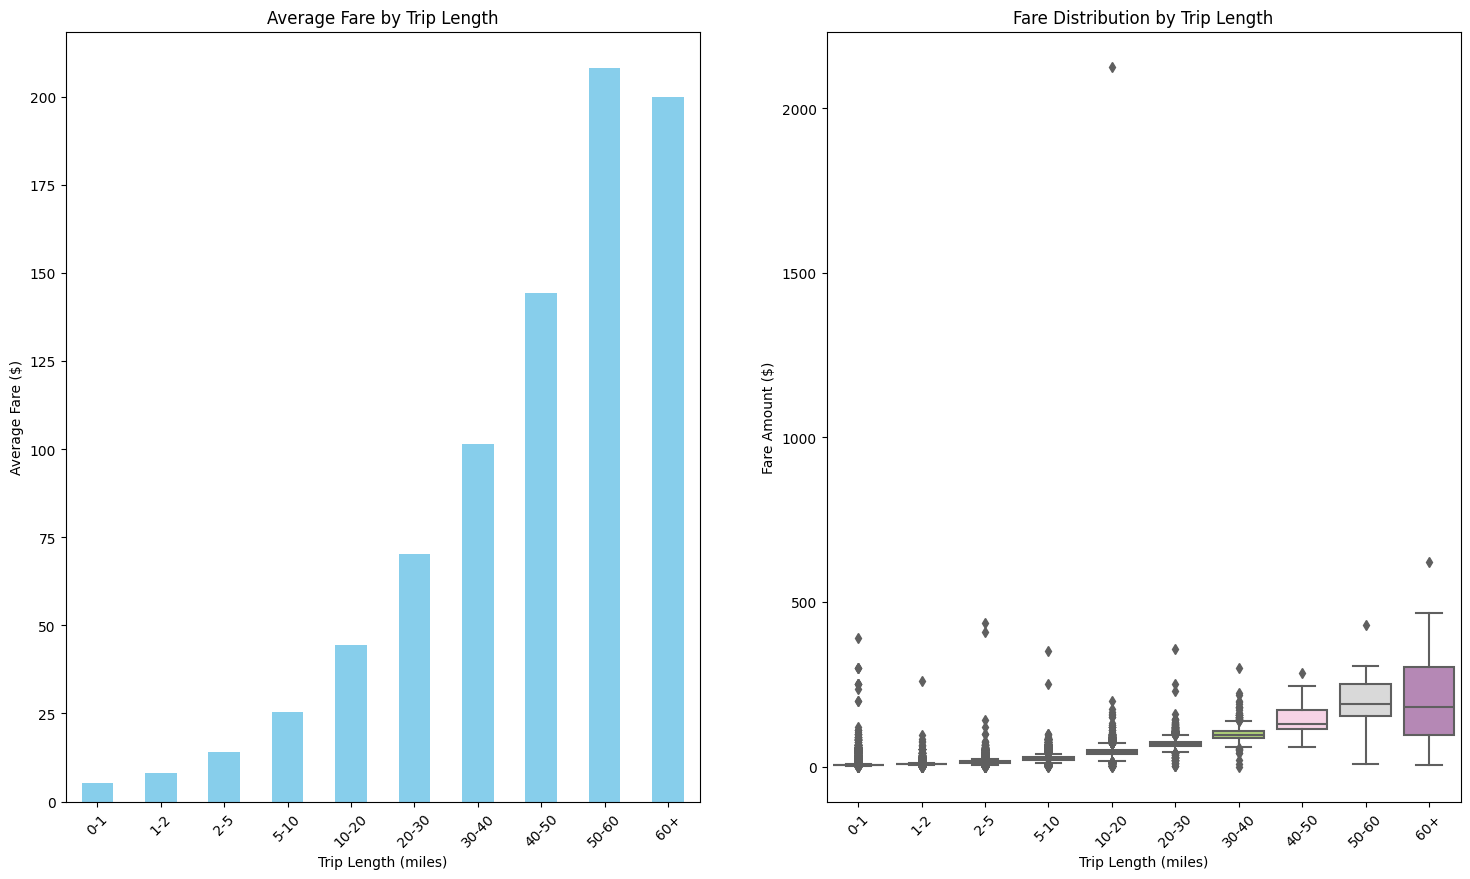

In [11]:
# Import necessary libraries
from azureml.opendatasets import NycTlcGreen
from datetime import datetime
from dateutil import parser
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the date range
end_date = parser.parse('2018-06-06')
start_date = parser.parse('2018-05-01')

# Fetch the dataset
nyc_tlc = NycTlcGreen(start_date=start_date, end_date=end_date)
nyc_tlc_df = nyc_tlc.to_pandas_dataframe()

# Display the columns to verify the names
print(nyc_tlc_df.columns)

# Check if 'trip_distance' exists, if not, print the columns to inspect
if 'tripDistance' not in nyc_tlc_df.columns:
    print("Column 'tripDistance' not found. Available columns are:")
    print(nyc_tlc_df.columns)
else:
    # Convert pickup and dropoff datetime to pandas datetime format
    nyc_tlc_df['lpepPickupDatetime'] = pd.to_datetime(nyc_tlc_df['lpepPickupDatetime'])
    nyc_tlc_df['lpepDropoffDatetime'] = pd.to_datetime(nyc_tlc_df['lpepDropoffDatetime'])

    # Compute trip duration in minutes
    nyc_tlc_df['trip_duration'] = (nyc_tlc_df['lpepDropoffDatetime'] - nyc_tlc_df['lpepPickupDatetime']).dt.total_seconds() / 60.0

    # Remove rows with zero or negative trip distances and fares for analysis
    nyc_tlc_df = nyc_tlc_df[(nyc_tlc_df['tripDistance'] > 0) & (nyc_tlc_df['fareAmount'] > 0)]

    # Define trip length categories
    bins = [0, 1, 2, 5, 10, 20, 30, 40, 50, 60, float('inf')]
    labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']
    nyc_tlc_df['trip_length_category'] = pd.cut(nyc_tlc_df['tripDistance'], bins=bins, labels=labels, right=False)

    # Compute average fares for each trip length category
    average_fares = nyc_tlc_df.groupby('trip_length_category')['fareAmount'].mean()

    # Plot average fares by trip length category
    plt.figure(figsize=(18, 10))

    plt.subplot(1, 2, 1)
    average_fares.plot(kind='bar', color='skyblue')
    plt.title('Average Fare by Trip Length')
    plt.xlabel('Trip Length (miles)')
    plt.ylabel('Average Fare ($)')
    plt.xticks(rotation=45)

    # Plot fare distribution for various trip lengths
    plt.subplot(1, 2, 2)
    sns.boxplot(x='trip_length_category', y='fareAmount', data=nyc_tlc_df, palette='Set3')
    plt.title('Fare Distribution by Trip Length')
    plt.xlabel('Trip Length (miles)')
    plt.ylabel('Fare Amount ($)')
    plt.xticks(rotation=45)
    
    plt.show()


## Tip Analysis
Investigate tipping patterns and their variation across different times and locations

In [58]:
# Add in the zones and boroughs to the dataframe
taxi_df = nyc_tlc_df.copy()

# Convert pickup datetime to pandas datetime format
taxi_df['lpepPickupDatetime'] = pd.to_datetime(taxi_df['lpepPickupDatetime'])

# Extract hour and day of the week from the pickup datetime
taxi_df['hour'] = taxi_df['lpepPickupDatetime'].dt.hour
taxi_df['day_of_week'] = taxi_df['lpepPickupDatetime'].dt.day_name()

# Extract month and year from the pickup datetime
taxi_df['month'] = taxi_df['lpepPickupDatetime'].dt.month.astype(str)
taxi_df['year'] = taxi_df['lpepPickupDatetime'].dt.year.astype(str)

# Define trip length categories
bins = [0, 1, 2, 5, 10, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']
taxi_df['trip_duration_category'] = pd.cut(taxi_df['trip_duration'], bins=bins, labels=labels, right=False)

In [59]:
# Import data on the Taxi Location Codes
zones_df = pd.read_csv('References/taxi_zones.csv')
zones_df['LocationID'] = zones_df['LocationID'].astype('str')

zones = zones_df.drop_duplicates(subset=['LocationID'])

In [60]:
# Add columns that identify the zone and borough of the pick up location
pu_zones = zones.rename(columns={'LocationID': 'puLocationId'})
zone_loc_df = taxi_df.merge(pu_zones, how='left', on='puLocationId')
#zone_loc_df = zone_taxi_df.merge(pu_zones, how='left', on='puLocationId').reindex(columns=['lpepPickupDatetime', 'lpepDropoffDatetime', 'passengerCount', 'tripDistance', 'puLocationId', 'zone', 'borough', 'doLocationId', 'tripType', 'hour', 'day_of_week', 'month', 'year'])
# Rename pickup zone and borough to be unique
zone_loc_df = zone_loc_df.rename(columns={'zone': 'puZone', 'borough': 'puBorough'})

# Add columns that identify the zone and borough of the drop off location
do_zones = zones.rename(columns={'LocationID': 'doLocationId'})
zone_loc_df = zone_loc_df.merge(do_zones, how='left', on='doLocationId')
#zone_loc_df = zone_loc_df.merge(do_zones, how='left', on='doLocationId').reindex(columns=['lpepPickupDatetime', 'lpepDropoffDatetime', 'passengerCount', 'tripDistance', 'puLocationId', 'puZone', 'puBorough', 'doLocationId', 'zone', 'borough', 'tripType', 'hour', 'day_of_week', 'month', 'year'])
# Rename pickup zone and borough to be unique
zone_loc_df = zone_loc_df.rename(columns={'zone': 'doZone', 'borough': 'doBorough'})

# Drop columns not needed for analysis
zone_loc_df = zone_loc_df.drop(columns=['pickupLongitude', 'pickupLatitude', 'dropoffLongitude', 'dropoffLatitude', 'storeAndFwdFlag',
                                        'OBJECTID_x', 'Shape_Leng_x', 'the_geom_x', 'Shape_Area_x', 'OBJECTID_y', 'Shape_Leng_y',
                                        'the_geom_y', 'Shape_Area_y', 'lpepPickupDatetime', 'lpepDropoffDatetime', 'puLocationId',
                                        'doLocationId'])

zone_loc_df.head()

,vendorID,passengerCount,tripDistance,rateCodeID,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,...,trip_length_category,hour,day_of_week,month,year,trip_duration_category,puZone,puBorough,doZone,doBorough
0,2,1,6.73,1,2,26.5,0.0,0.5,0.3,0.0,...,5-10,20,Friday,5,2018,30-40,East Harlem North,Manhattan,Gramercy,Manhattan
1,2,1,0.51,1,2,4.5,0.0,0.5,0.3,0.0,...,0-1,20,Friday,5,2018,2-5,Morningside Heights,Manhattan,Morningside Heights,Manhattan
2,2,1,2.60,1,2,12.0,0.0,0.5,0.3,0.0,...,2-5,20,Friday,5,2018,10-20,Morningside Heights,Manhattan,East Harlem South,Manhattan
3,2,1,3.04,1,2,13.5,0.0,0.5,0.3,0.0,...,2-5,20,Friday,5,2018,10-20,East Harlem South,Manhattan,Manhattanville,Manhattan
4,2,1,1.60,1,2,10.0,0.0,0.5,0.3,0.0,...,1-2,14,Tuesday,5,2018,10-20,Hamilton Heights,Manhattan,Washington Heights North,Manhattan


### Tip Analysis by Time of Day and Day of Week

In [86]:
# Group by hour
hour_tip_avg = zone_loc_df.groupby(['trip_length_category','hour'])['tripDistance'].mean().unstack().reindex(index=['0-1', '1-2', '2-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+'])
hour_tip_avg

# Group by day of the week
day_tip_avg = zone_loc_df.groupby(['trip_length_category','day_of_week'])['tripDistance'].mean().unstack().reindex(index=['0-1', '1-2', '2-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+'])

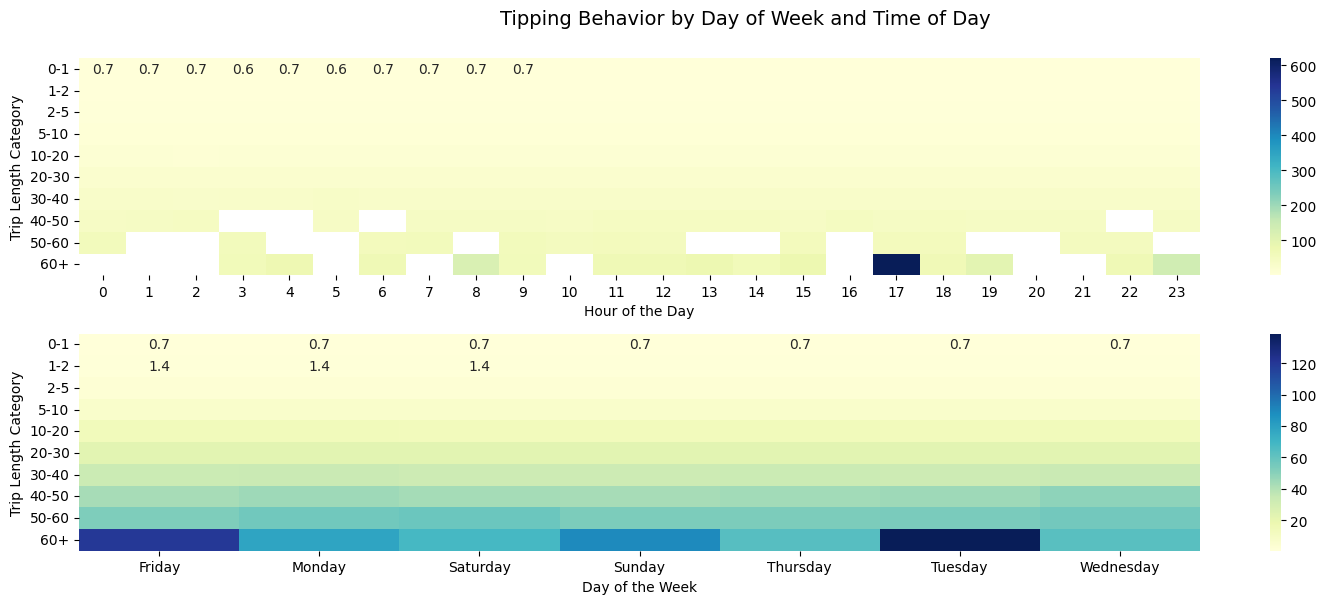

In [40]:
plt.figure(figsize=(15,6))

plt.subplot(2, 1, 1)
sns.heatmap(hour_tip_avg, cmap='YlGnBu', annot=True, fmt='.1f')
plt.xlabel('Hour of the Day', size=10)
plt.ylabel('Trip Length Category', size=10)

plt.subplot(2, 1, 2)
sns.heatmap(day_tip_avg, cmap='YlGnBu', annot=True, fmt='.1f')
plt.xlabel('Day of the Week', size=10)
plt.ylabel('Trip Length Category', size=10)

plt.suptitle("Tipping Behavior by Day of Week and Time of Day", y=1, fontsize=14)
plt.tight_layout()
plt.show()

**Discussion of Analysis** Tipping behavior is less impacted by time of day. The day of the week heatmap shows how the average tip increases as the trip length category increases.

### Tip Analysis by Borough

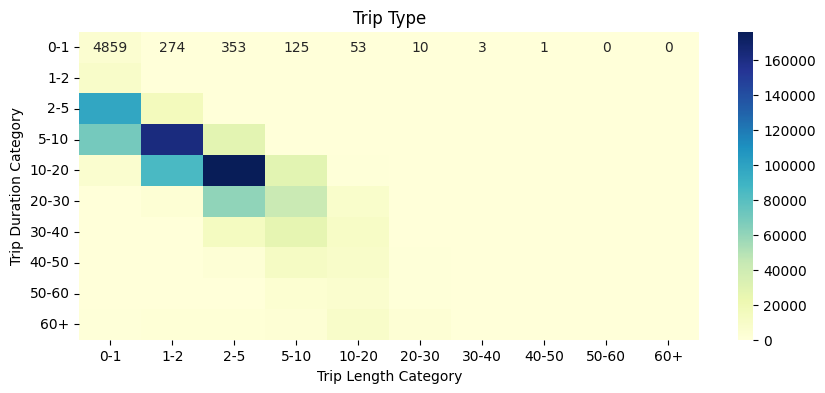

In [72]:
category_df = zone_loc_df.groupby(['trip_duration_category', 'trip_length_category']).size().unstack()

plt.figure(figsize=(10, 4))
sns.heatmap(category_df, cmap='YlGnBu', annot=True, fmt='d')
plt.ylabel('Trip Duration Category')
plt.xlabel('Trip Length Category')
plt.title('Trip Type')
plt.show()

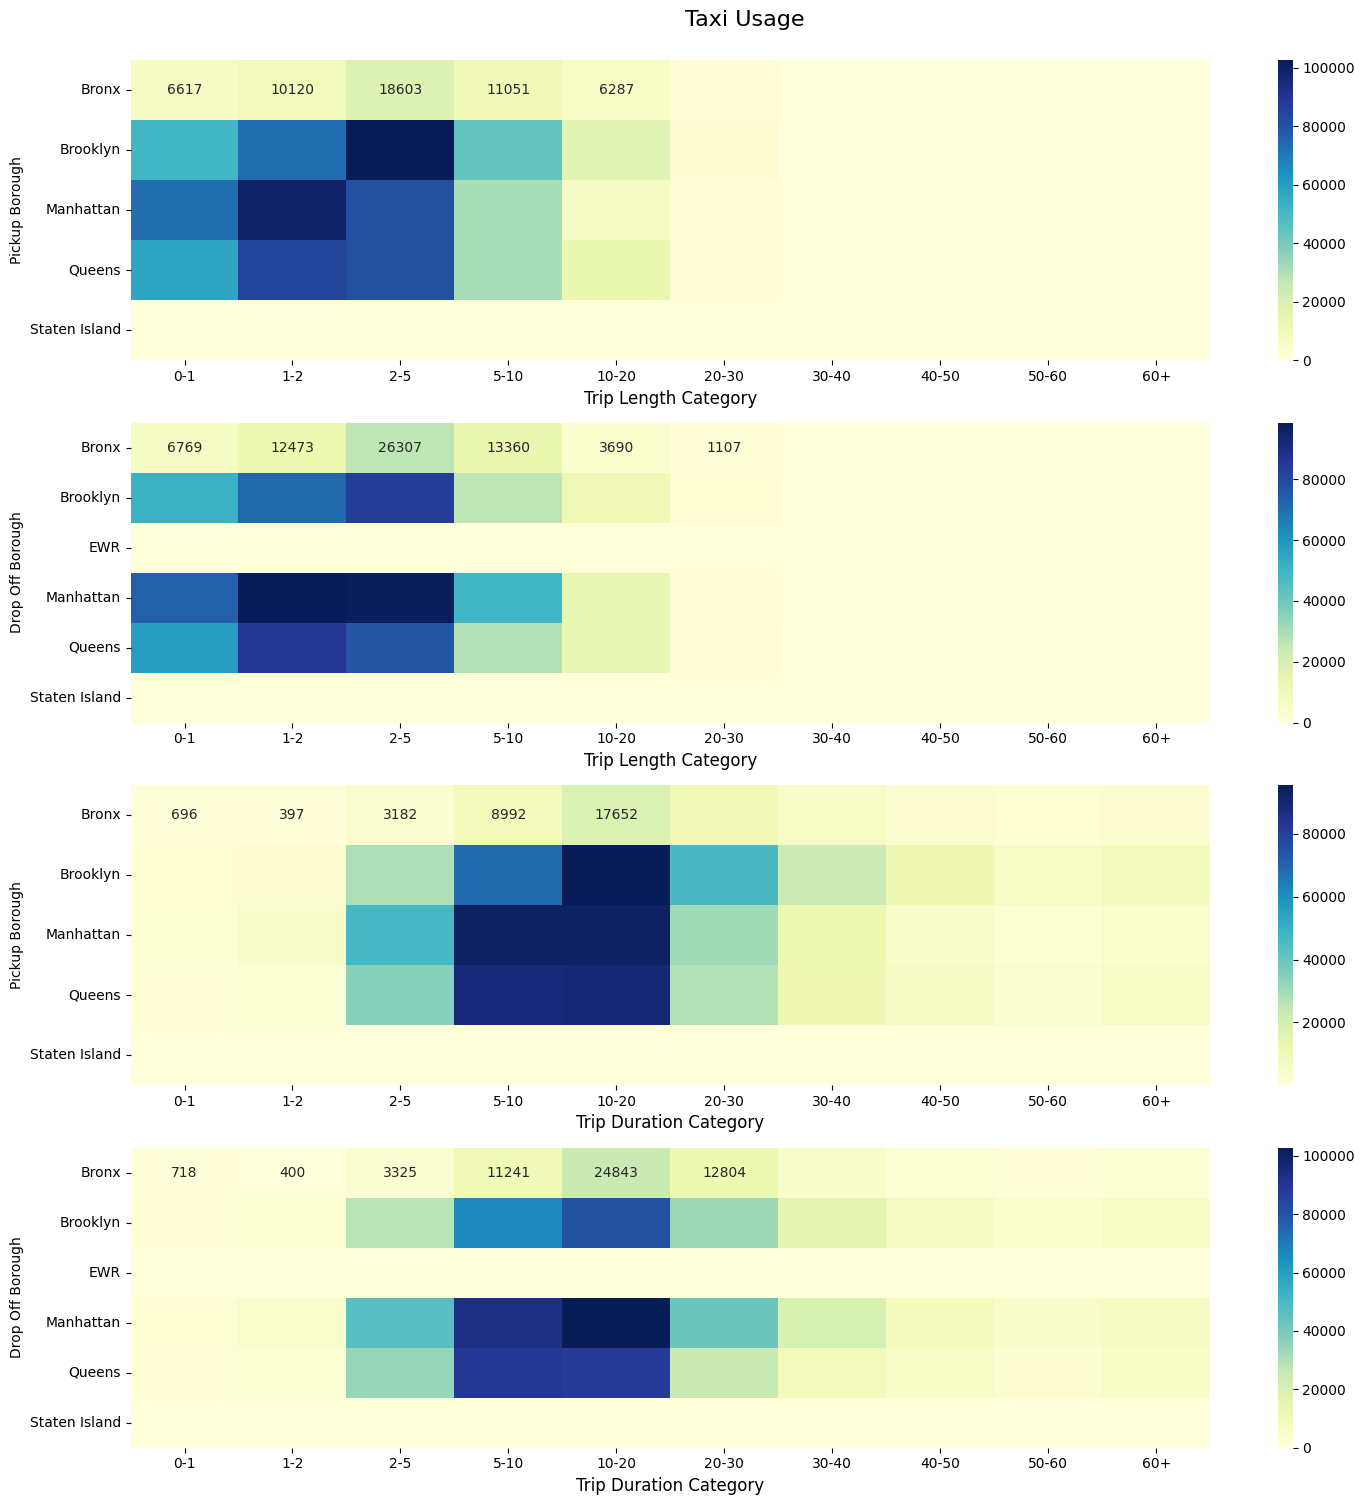

In [69]:
puB_loc_df = zone_loc_df.groupby(['puBorough', 'trip_length_category']).size().unstack()
doB_loc_df = zone_loc_df.groupby(['doBorough', 'trip_length_category']).size().unstack()
puB_duration_df = zone_loc_df.groupby(['puBorough', 'trip_duration_category']).size().unstack()
doB_duration_df = zone_loc_df.groupby(['doBorough', 'trip_duration_category']).size().unstack()

plt.figure(figsize=(15, 15))

plt.subplot(4, 1, 1)
sns.heatmap(puB_loc_df, cmap='YlGnBu', annot=True, fmt='d').set(xlabel=None)
plt.ylabel('Pickup Borough')
plt.xlabel('Trip Length Category', size=12)

plt.subplot(4, 1, 2)
sns.heatmap(doB_loc_df, cmap='YlGnBu', annot=True, fmt='d')
plt.ylabel('Drop Off Borough')
plt.xlabel('Trip Length Category', size=12)

plt.subplot(4, 1, 3)
sns.heatmap(puB_duration_df, cmap='YlGnBu', annot=True, fmt='d').set(xlabel=None)
plt.ylabel('Pickup Borough')
plt.xlabel('Trip Duration Category', size=12)

plt.subplot(4, 1, 4)
sns.heatmap(doB_duration_df, cmap='YlGnBu', annot=True, fmt='d')
plt.ylabel('Drop Off Borough')
plt.xlabel('Trip Duration Category', size=12)


plt.suptitle("Taxi Usage", y=1, fontsize=16)
plt.tight_layout()
plt.show()

**Discussion of Analysis** 

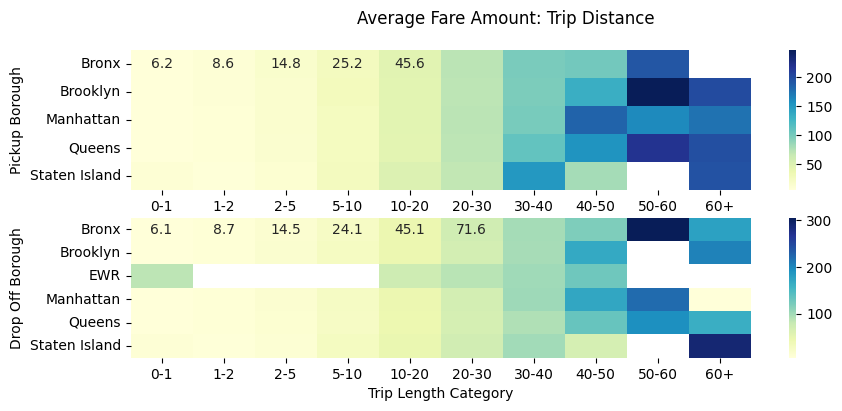

In [74]:
puB_fare_df = zone_loc_df.groupby(['puBorough', 'trip_length_category'])['fareAmount'].mean().unstack()
doB_fare_df = zone_loc_df.groupby(['doBorough', 'trip_length_category'])['fareAmount'].mean().unstack()

plt.figure(figsize=(10, 4))

plt.subplot(2, 1, 1)
sns.heatmap(puB_fare_df, cmap='YlGnBu', annot=True, fmt='.1f').set(xlabel=None)
plt.ylabel('Pickup Borough')

plt.subplot(2, 1, 2)
sns.heatmap(doB_fare_df, cmap='YlGnBu', annot=True, fmt='.1f')
plt.ylabel('Drop Off Borough')
plt.xlabel('Trip Length Category')

plt.suptitle("Average Fare Amount: Trip Distance", fontsize=12)
plt.show()

**Discussion of Analysis** 

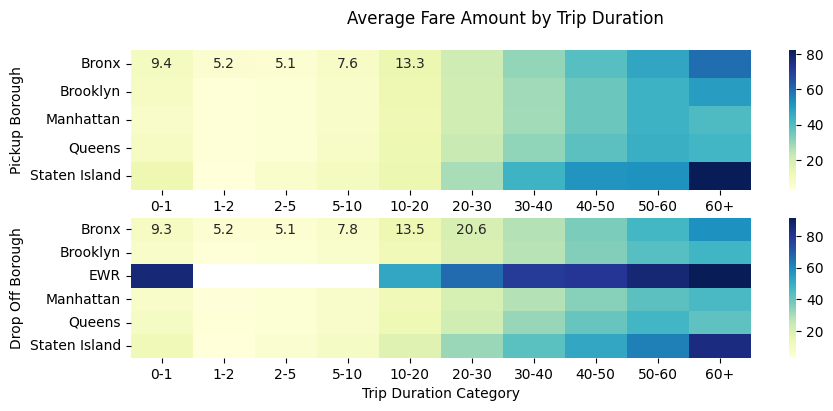

In [75]:
puB_d_fare_df = zone_loc_df.groupby(['puBorough', 'trip_duration_category'])['fareAmount'].mean().unstack()
doB_d_fare_df = zone_loc_df.groupby(['doBorough', 'trip_duration_category'])['fareAmount'].mean().unstack()

plt.figure(figsize=(10, 4))

plt.subplot(2, 1, 1)
sns.heatmap(puB_d_fare_df, cmap='YlGnBu', annot=True, fmt='.1f').set(xlabel=None)
plt.ylabel('Pickup Borough')

plt.subplot(2, 1, 2)
sns.heatmap(doB_d_fare_df, cmap='YlGnBu', annot=True, fmt='.1f')
plt.ylabel('Drop Off Borough')
plt.xlabel('Trip Duration Category')

plt.suptitle("Average Fare Amount by Trip Duration", fontsize=12)
plt.show()

**Discussion of Analysis**

In [84]:
print(f"average tip amount: ${round(zone_loc_df['tipAmount'].mean(),2)}")
puB_tip_byBorough = zone_loc_df.groupby('puBorough')['tipAmount'].mean()
puB_tip_byBorough

average tip amount: $1.03


puBorough
Bronx            0.436615
Brooklyn         1.279874
Manhattan        1.103910
Queens           0.806496
Staten Island    0.603909
Name: tipAmount, dtype: float64

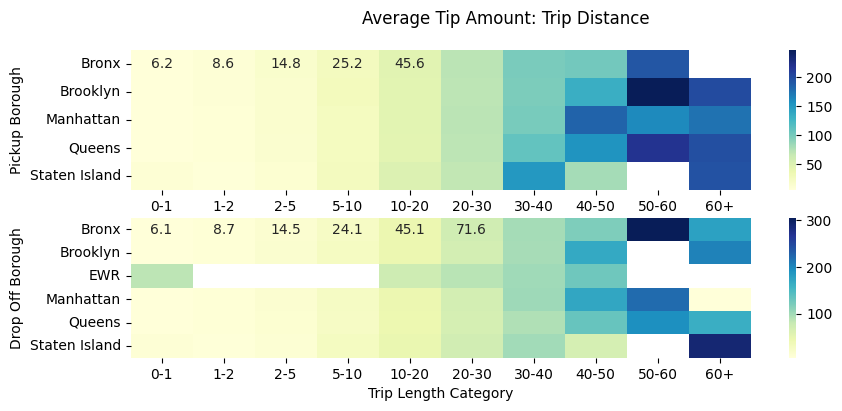

In [76]:
puB_tip_df = zone_loc_df.groupby(['puBorough', 'trip_length_category'])['tipAmount'].mean().unstack()
doB_tip_df = zone_loc_df.groupby(['doBorough', 'trip_length_category'])['tipAmount'].mean().unstack()

plt.figure(figsize=(10, 4))

plt.subplot(2, 1, 1)
sns.heatmap(puB_fare_df, cmap='YlGnBu', annot=True, fmt='.1f').set(xlabel=None)
plt.ylabel('Pickup Borough')

plt.subplot(2, 1, 2)
sns.heatmap(doB_fare_df, cmap='YlGnBu', annot=True, fmt='.1f')
plt.ylabel('Drop Off Borough')
plt.xlabel('Trip Length Category')

plt.suptitle("Average Tip Amount: Trip Distance", fontsize=12)
plt.show()

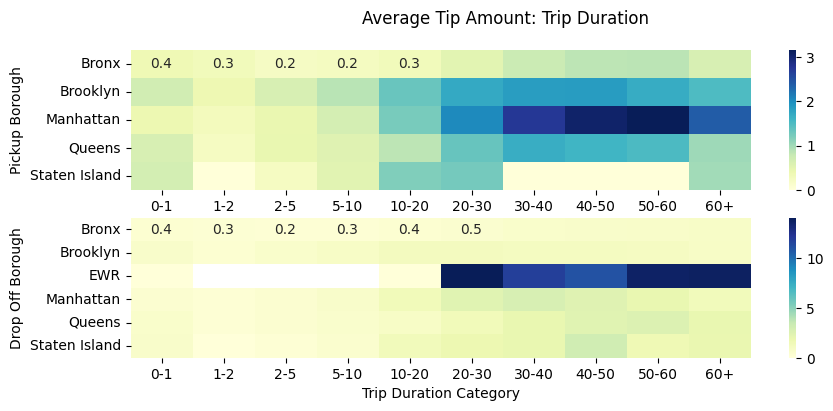

In [85]:
puB_d_tip_df = zone_loc_df.groupby(['puBorough', 'trip_duration_category'])['tipAmount'].mean().unstack()
doB_d_tip_df = zone_loc_df.groupby(['doBorough', 'trip_duration_category'])['tipAmount'].mean().unstack()

plt.figure(figsize=(10, 4))

plt.subplot(2, 1, 1)
sns.heatmap(puB_d_tip_df, cmap='YlGnBu', annot=True, fmt='.1f').set(xlabel=None)
plt.ylabel('Pickup Borough')

plt.subplot(2, 1, 2)
sns.heatmap(doB_d_tip_df, cmap='YlGnBu', annot=True, fmt='.1f')
plt.ylabel('Drop Off Borough')
plt.xlabel('Trip Duration Category')

plt.suptitle("Average Tip Amount: Trip Duration", fontsize=12)
plt.show()

**Discussion of Analysis** Riders that travel longer distances give larger tips on average. In general, riders don't tip too much.